Fourier Transform is used to __analyze the frequency characteristics__ of various filters.   
Frequency refers to the number of times a wave oscillates over time.
At this time, the wave can be expressed as a trigonometric function of Sin and cos, and analysis is possible from the perspective of frequency.  

- Fourier transform converts the change in brightness into frequency.  
- For images, __2D Discrete Fourier Transform (DFT)__ is used to __find the frequency domain.__ 
>- DFT is the Fourier transform of an image.  
  
- A fast algorithm called __Fast Fourier Transform (FFT)__ is used for __calculation of DFT.__

So how can Fourier transform be applied to an image?
Images can also be converted into waves.
High frequency is used in places where there is a lot of brightness conversion with surrounding pixels.
Areas with little conversion can be expressed at low frequencies.  


In other words, __the meaning of high frequency in an image means a boundary line,__
__Low frequencies refer to the background.__  

Therefore, if you remove the high frequencies, the boundary line disappears.
If you remove the low frequencies, only the border remains.

You can go through the image -> Fourier transform -> remove high or low frequencies -> image transform again, leaving only the border or background.

- np.fft.fftshift is a function that rearranges the frequencies converted to dpf.
        
- The part with a frequency of 0 is placed in the very center, and as the frequency increases, it is placed at the edge.  

- In order to create an image that we can view, we put the dft_shifted values into the magnitude function, which calculates a 2-dimensional vector value.   
- Since these values are very large, the log is taken to create an image that can be output.    
    
        
## ● inverse Fourier transform    

- You can convert images into frequencies using the Fourier transform, but you can also convert frequencies into images in the same way. It is called Inverse Fourier Transform.  
        (Inverse Fourier Transform)   
- In order to perform the inverse Fourier transform,   
>- the rearranged frequencies must be rearranged back to their original arrangement.  
>- So, convert the fftshifted dft_shift by putting it back into fftshift.
>- Input the converted frequency back into the dft function.   
>- However, this time, flags inputs DFT_INVERSE, which creates an image with the inverse frequency.
>- Lastly, the INVERSE values are entered into the magnitude function and converted to an image.   
  

## ● Fourier Transform in Numpy  

First we will see how to find Fourier Transform using Numpy.   
Numpy has an FFT package to do this.   
- **np.fft.fft2()** provides us the frequency transform which will be a complex array.   
- Its first argument is the __input image, which is grayscale.__   
- Second argument is optional which decides __the size of output array.__   
- If it is greater than size of input image, input image is padded with zeros before calculation of FFT.   
- If it is less than input image, input image will be cropped.   
- If no arguments passed, Output array size will be same as input.

Now once you got the result, zero frequency component (DC component) will be at top left corner.   
If you want to bring it to center, you need to shift the result by N2 in both the directions.   
- This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze).   
- Once you found the frequency transform, you can find the magnitude spectrum.

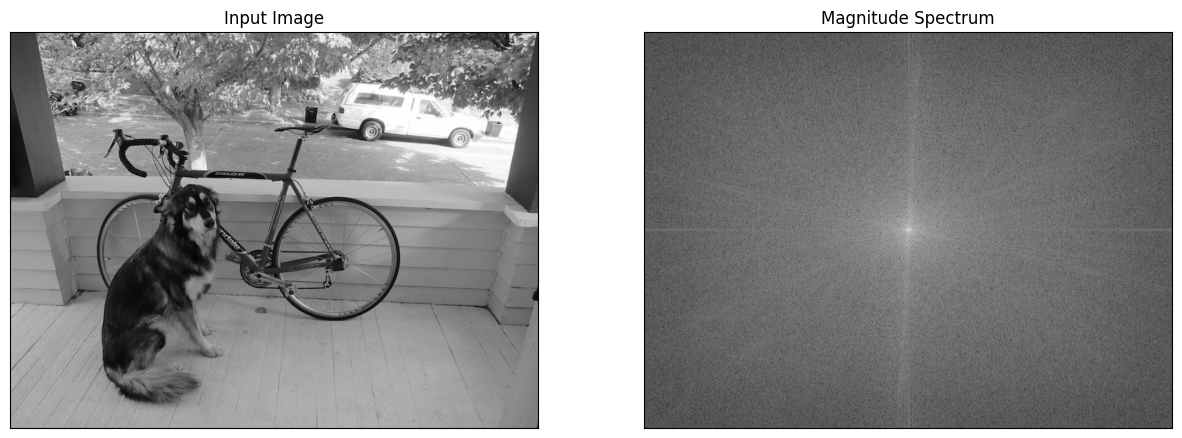

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=100)

img = cv.imread('./images/dog.jpg', cv.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)) 

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

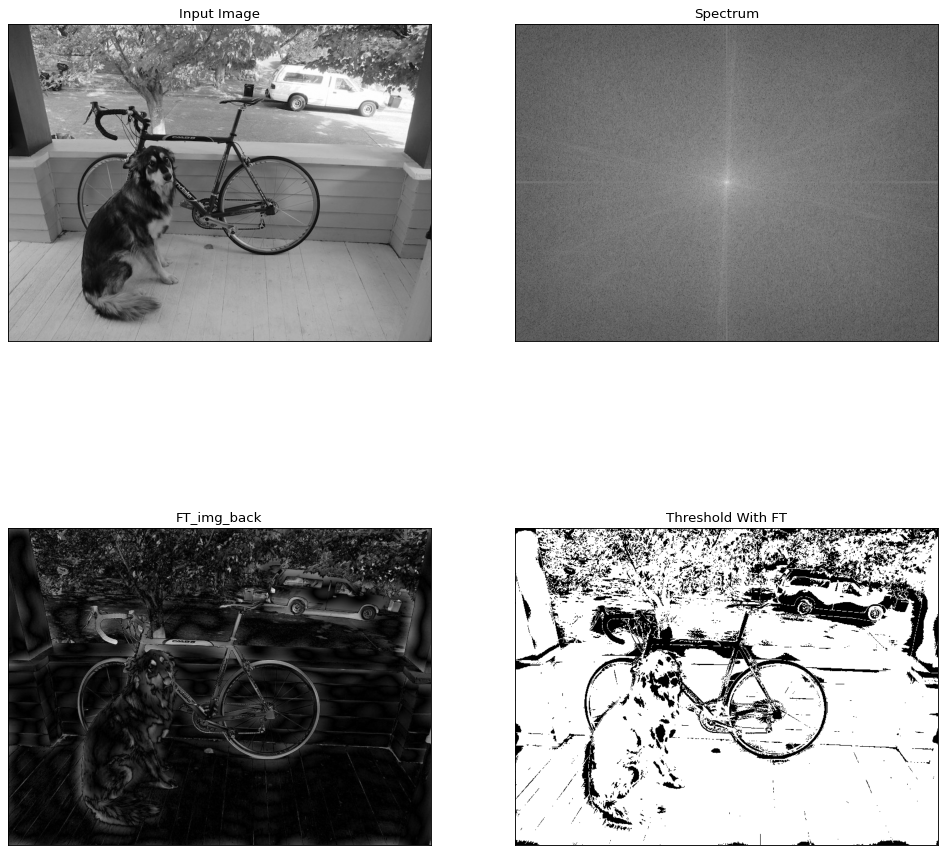

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/dog.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
"""
# Apply Fourier Transform.
  When applied, 0,0, that is, the upper left point of the screen is the center, and low frequencies are concentrated there.
  To facilitate analysis, 0,0 is moved to the center of the image and converted to a result that is easy to analyze through log scaling.
  
# Fourier Transform을 적용.
 
"""
f = np.fft.fft2(img)          # Fourier Transform
fshift = np.fft.fftshift(f)   # 0,0 is moved to the center of the image.
magnitude_spectrum = 20*np.log(np.abs(fshift)) # log scaling

rows, cols = img.shape
crow, ccol = rows//2, cols//2   # the center of the image

# Set the value of the 10X10 square in the center to 1. Remove all low frequencies in the center
# Because the low frequencies have been removed, the background disappears and only the border remains.



d = 10
fshift[crow-d:crow+d+1, ccol-d:ccol+d+1] = 1

# Convert the Fourier transform result back to an image 
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

img_new = np.uint8(img_back);  # Convert float type to int type
ret, thresh = cv2.threshold(img_new,30,255,cv2.THRESH_BINARY_INV)


from matplotlib import pyplot as plt
figure(figsize=(15, 15), dpi=80)  

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(img_back, cmap = 'gray')
plt.title('FT_img_back'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold With FT'), plt.xticks([]), plt.yticks([])
plt.show()

## ● Fourier Transform in OpenCV  

OpenCV provides the functions **cv.dft()** and **cv.idft()** for this.   
It returns the same result as previous, but with two channels.   
- First channel will have the real part of the result and   
- second channel will have the imaginary part of the result.   
The input image should be converted to np.float32 first.

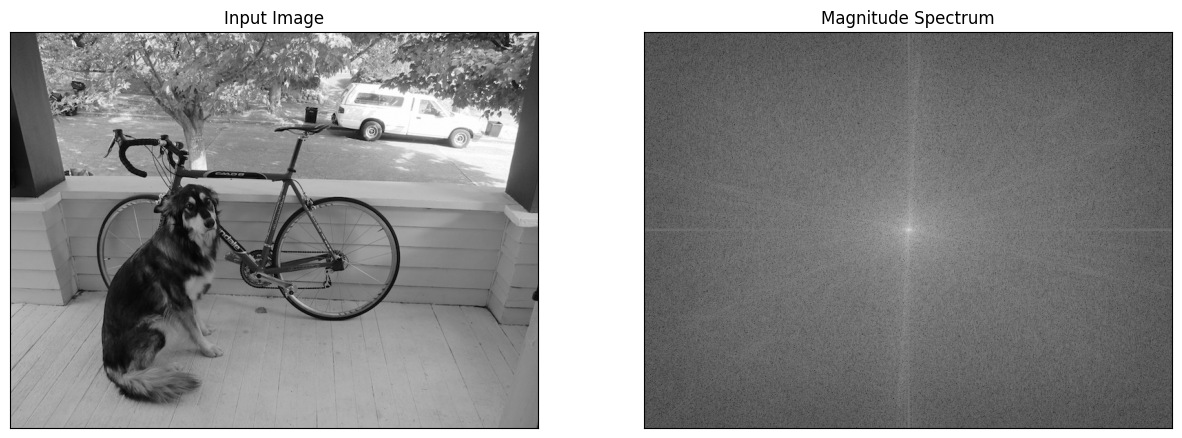

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=100)
img = cv.imread('./images/dog.jpg', cv.IMREAD_GRAYSCALE)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

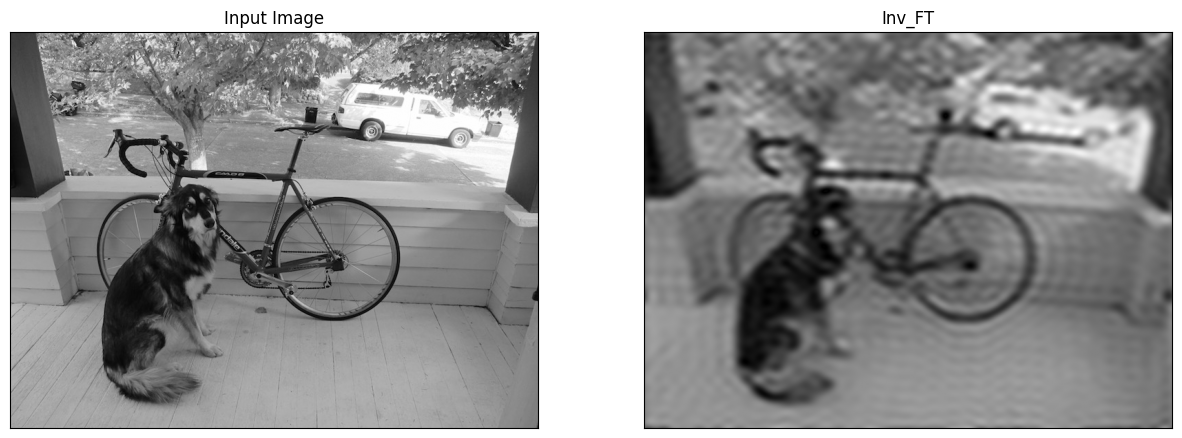

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./images/dog.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# Below is a form of creating a square of size d and then removing the outside of the square (i.e. removing the high frequency area).
# The smaller the d value, the smaller the square, and the outer area, that is, the high frequency area, is removed, so the image becomes blurry.
# The larger the d value, the larger the square and the closer it is to the original image because less of the outer area, that is, the high-frequency area, is removed.



d = 30
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-d:crow+d+1, ccol-d:ccol+d+1] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

figure(figsize=(15, 10), dpi=100)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Inv_FT'), plt.xticks([]), plt.yticks([])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5092\897809044.py:20: RuntimeWarning: divide by zero encountered in log
  out_low = 20*np.log(cv2.magnitude(LPF_shift[:, :, 0], LPF_shift[:, :, 1]))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5092\897809044.py:29: RuntimeWarning: divide by zero encountered in log
  out_high = 20*np.log(cv2.magnitude(HPF_shift[:, :, 0], HPF_shift[:, :, 1]))


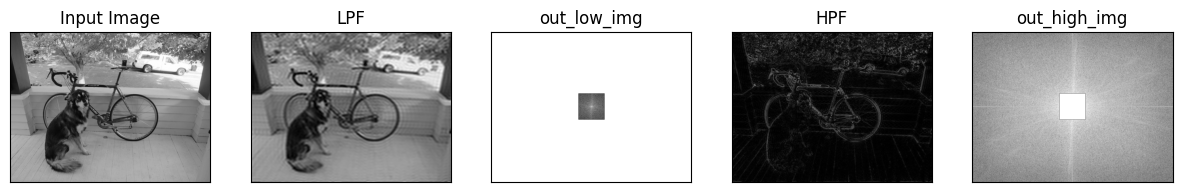

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread('./images/dog.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
row, col = int(height / 2), int(width / 2)

# LPF
LPF = np.zeros((height, width, 2), np.uint8)
LPF[row - 50:row + 50, col - 50:col + 50] = 1
LPF_shift = dft_shift * LPF
LPF_ishift = np.fft.ifftshift(LPF_shift)
LPF_img = cv2.idft(LPF_ishift)
LPF_img = cv2.magnitude(LPF_img[:, :, 0], LPF_img[:, :, 1])
out_low = 20*np.log(cv2.magnitude(LPF_shift[:, :, 0], LPF_shift[:, :, 1]))  

# HPF
HPF = np.ones((height, width, 2), np.uint8)
HPF[row - 50:row + 50, col - 50:col + 50] = 0
HPF_shift = dft_shift * HPF
HPF_ishift = np.fft.ifftshift(HPF_shift)
HPF_img = cv2.idft(HPF_ishift)
HPF_img = cv2.magnitude(HPF_img[:, :, 0], HPF_img[:, :, 1])
out_high = 20*np.log(cv2.magnitude(HPF_shift[:, :, 0], HPF_shift[:, :, 1]))  

figure(figsize=(15, 10), dpi=100)

plt.subplot(151), plt.imshow(gray, cmap='gray'),plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(LPF_img, cmap='gray'),plt.title('LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(out_low, cmap='gray'),plt.title('out_low_img'), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(HPF_img, cmap='gray'),plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(out_high, cmap='gray'),plt.title('out_high_img'), plt.xticks([]), plt.yticks([])

plt.show()

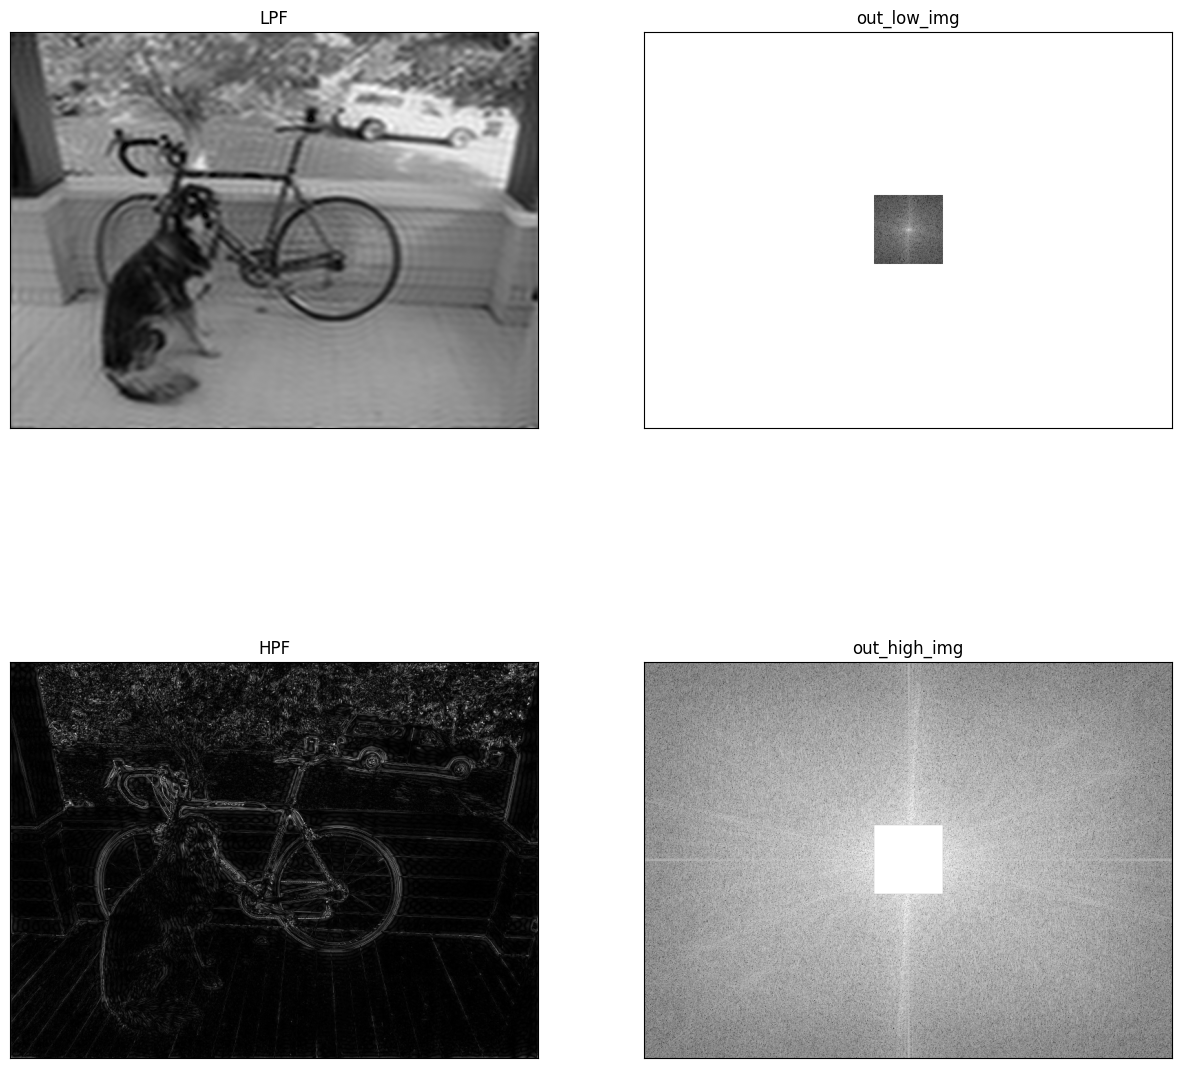

In [9]:
figure(figsize=(15, 15), dpi=100)

plt.subplot(221), plt.imshow(LPF_img, cmap='gray'),plt.title('LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(out_low, cmap='gray'),plt.title('out_low_img'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(HPF_img, cmap='gray'),plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(out_high, cmap='gray'),plt.title('out_high_img'), plt.xticks([]), plt.yticks([])

plt.show()